# importing all the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data collection

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Car price prediction/car data.csv')

In [3]:
#to check the first 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#to check the shape of the dataset
df.shape

(301, 9)

In [5]:
#to check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#check the statistical measure of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
#check for any missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#check for the type of car in Fuel_Type column
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
#check for the category in Seller_Type column
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
#check for the category in Transmission column
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding

In [11]:
#convet categorical data into numerical data
encoder = LabelEncoder()

objlist = df.select_dtypes(include = 'object').columns
objlist = objlist.drop('Car_Name')

for col_name in objlist:
    df[col_name] = encoder.fit_transform(df[col_name].astype(str))

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [13]:
#check for the type of car in Fuel_Type column after encoding
df['Fuel_Type'].value_counts()

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64

Splitting the data and label

In [14]:
X = df.drop(columns = ['Car_Name', 'Selling_Price'], axis = 1)
Y = df['Selling_Price']

In [15]:
print(X.shape, Y.shape)

(301, 7) (301,)


# Splitting the data into training and testing data and then model evaluation

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .1, random_state = 2)

# model training: linear regression

In [17]:
model1 = LinearRegression()

In [18]:
model1.fit(x_train, y_train)

LinearRegression()

model evaluation

R SQUARED ERROR : 0.8635655509198671


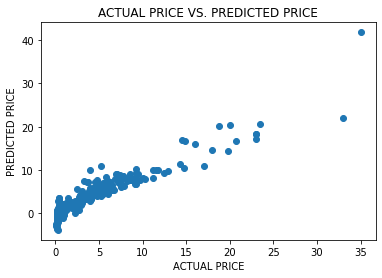

In [19]:
#prediction on training data
training_prediction = model1.predict(x_train)

#R squared error
error_score = metrics.r2_score(training_prediction, y_train)
print('R SQUARED ERROR :', error_score)

#visualize the actual and predicted price
plt.scatter(y_train, training_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')
plt.show()

R SQUARED ERROR : 0.8062199941176222


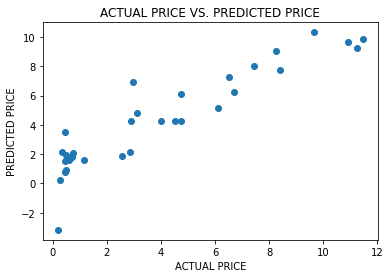

In [20]:
#prediction on testing data
testing_prediction = model1.predict(x_test)

#R squared error
error_score_test = metrics.r2_score(testing_prediction, y_test)
print('R SQUARED ERROR :', error_score_test)

#visualize the actual and predicted price
plt.scatter(y_test, testing_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')
plt.show()

# model training : lasso regression

In [21]:
model2 = Lasso()

model2.fit(x_train, y_train)

Lasso()

model evaluation

R SQUARED ERROR : 0.798459024070425


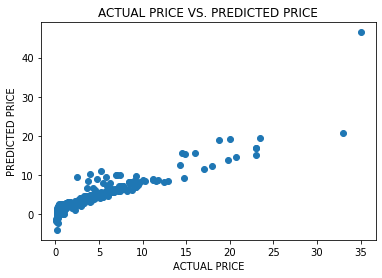

In [22]:
#prediction on training data
training_prediction = model2.predict(x_train)

#R squared error
error_score = metrics.r2_score(training_prediction, y_train)
print('R SQUARED ERROR :', error_score)

#visualize the actual and predicted price
plt.scatter(y_train, training_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')
plt.show()

R SQUARED ERROR : 0.7711110403265475


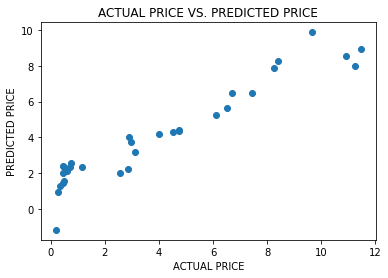

In [23]:
#prediction on testing data
testing_prediction = model2.predict(x_test)

#R squared error
error_score_test = metrics.r2_score(testing_prediction, y_test)
print('R SQUARED ERROR :', error_score_test)

#visualize the actual and predicted price
plt.scatter(y_test, testing_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS. PREDICTED PRICE')
plt.show()